In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library**

In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import cv2

import random
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.random import set_seed
set_seed(42)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'



print(tf.__version__)
print(cv2.__version__)

2.18.0
4.11.0


# **Prepare Dataset**

In [ ]:
dataset = "/content/drive/MyDrive/Nexmedis/chest_xray"

train_path = os.path.join(dataset,"train")
test_path = os.path.join(dataset,"test")
val_path = os.path.join(dataset,"val")

print(train_path)
print(test_path)
print(val_path)

/content/drive/MyDrive/Nexmedis/chest_xray/train
/content/drive/MyDrive/Nexmedis/chest_xray/test
/content/drive/MyDrive/Nexmedis/chest_xray/val


In [ ]:
import glob

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_bacterial = glob.glob(train_path+"/PNEUMONIA BACTERIAL/*.jpeg")
train_viral = glob.glob(train_path+"/PNEUMONIA VIRAL/*.jpeg")

val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_bacterial = glob.glob(val_path+"/PNEUMONIA BACTERIAL/*.jpeg")
val_viral = glob.glob(val_path+"/PNEUMONIA VIRAL/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_bacterial = glob.glob(test_path+"/PNEUMONIA BACTERIAL/*.jpeg")
test_viral = glob.glob(test_path+"/PNEUMONIA VIRAL/*.jpeg")

In [ ]:
print(len(train_normal),len(train_bacterial),len(train_viral))
print(len(val_normal),len(val_bacterial),len(val_viral))
print(len(test_normal),len(test_bacterial),len(test_viral))

1341 2530 1337
234 242 148
8 8 8


In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_bacterial])
train_list.extend([x for x in train_viral])

print(type(train_list))

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Baterial']*len(train_bacterial),
                                        ['Viral']*len(train_viral)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

df_train

<class 'list'>


,class,image
0,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
1,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
2,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
3,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
4,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
...,...,...
5203,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
5204,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
5205,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/tra...
5206,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/tra...


In [ ]:
val_list = [x for x in val_normal]
val_list.extend([x for x in val_bacterial])
val_list.extend([x for x in val_viral])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Baterial']*len(val_bacterial),
                                        ['Viral']*len(val_viral)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

df_val

,class,image
0,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/val...
1,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/val...
2,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/val...
3,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/val...
4,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/val...
...,...,...
619,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/val...
620,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/val...
621,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/val...
622,Viral,/content/drive/MyDrive/Nexmedis/chest_xray/val...


In [ ]:
test_list = [x for x in test_normal]
test_list.extend([x for x in test_bacterial])
test_list.extend([x for x in test_viral])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Baterial']*len(test_bacterial),
                                        ['Viral']*len(test_viral)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

df_test

,class,image
0,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
1,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
2,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
3,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
4,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
5,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
6,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
7,Normal,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
8,Baterial,/content/drive/MyDrive/Nexmedis/chest_xray/tes...
9,Baterial,/content/drive/MyDrive/Nexmedis/chest_xray/tes...


# **Normalization, Augmentation**

In [ ]:
IMG_SIZE = 256
BATCH = 32
SEED = 47

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(df_train,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'categorical',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(df_val,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'categorical',
                                             batch = BATCH,
                                             seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                          x_col = 'image',
                                          y_col = 'class',
                                          target_size = (IMG_SIZE, IMG_SIZE),
                                          class_mode = 'categorical',
                                          batch_size = BATCH,
                                          seed = SEED)

Found 5208 validated image filenames belonging to 3 classes.
Found 624 validated image filenames belonging to 3 classes.
Found 24 validated image filenames belonging to 3 classes.


# **CNN Model**

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [ ]:
def get_model():
  inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

  x = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(inputs)
  x = layers.MaxPooling2D()(x)

  x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D()(x)

  x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D()(x)

  x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.MaxPooling2D()(x)

  # Head
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(0.5)(x)

  # Output
  output = layers.Dense(3, activation='softmax')(x)

  model = keras.Model(inputs=[inputs], outputs=output)

  return model

In [ ]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(learning_rate=3e-3), metrics=['categorical_accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,487,075 (32.38 MB)

 Trainable params: 8,487,075 (32.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = "/content/drive/MyDrive/Nexmedis/Model Checkpoint/cnn-3.h5"

checkpoint = ModelCheckpoint(filepath=model_path,
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

In [ ]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[checkpoint, early_stopping, plateau],
          steps_per_epoch=(len(df_train) // BATCH),
          validation_steps=(len(df_val) // BATCH));


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - categorical_accuracy: 0.5143 - loss: 1.3435
Epoch 1: val_loss improved from inf to 0.90774, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/cnn-3.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 634s 4s/step - categorical_accuracy: 0.5147 - loss: 1.3412 - val_categorical_accuracy: 0.6464 - val_loss: 0.9077 - learning_rate: 0.0030
Epoch 2/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 20:44 8s/step - categorical_accuracy: 0.6875 - loss: 0.7922

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.90774
162/162 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - categorical_accuracy: 0.6875 - loss: 0.7922 - val_categorical_accuracy: 0.6283 - val_loss: 0.9410 - learning_rate: 0.0030
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - categorical_accuracy: 0.6858 - loss: 0.7231
Epoch 3: val_loss improved from 0.90774 to 0.74150, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/cnn-3.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 635s 4s/step - categorical_accuracy: 0.6859 - loss: 0.7229 - val_categorical_accuracy: 0.7516 - val_loss: 0.7415 - learning_rate: 0.0030
Epoch 4/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 9:38 4s/step - categorical_accuracy: 0.7500 - loss: 0.6294
Epoch 4: val_loss did not improve from 0.74150
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 222ms/step - categorical_accuracy: 0.7500 - loss: 0.6294 - val_categorical_accuracy: 0.7467 - val_loss: 0.7506 - learning_rate: 0.0030
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - categorical_accuracy: 0.7256 - loss: 0.6430
Epoch 5: val_loss improved from 0.74150 to 0.69350, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/cnn-3.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step - categorical_accuracy: 0.7257 - loss: 0.6429 - val_categorical_accuracy: 0.7319 - val_loss: 0.6935 - learning_rate: 0.0030
Epoch 6/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 9:39 4s/step - categorical_accuracy: 0.7812 - loss: 0.6945
Epoch 6: val_loss did not improve from 0.69350
162/162 ━━━━━━━━━━━━━━━━━━━━ 39s 223ms/step - categorical_accuracy: 0.7812 - loss: 0.6945 - val_categorical_accuracy: 0.6875 - val_loss: 0.7827 - learning_rate: 0.0030
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - categorical_accuracy: 0.7369 - loss: 0.6117
Epoch 7: val_loss did not improve from 0.69350

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0006000000052154065.
162/162 ━━━━━━━━━━━━━━━━━━━━ 621s 4s/step - categorical_accuracy: 0.7369 - loss: 0.6117 - val_categorical_accuracy: 0.7220 - val_loss: 0.7572 - learning_rate: 0.0030
Epoch 8/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 12:12 5s/step - categorical_accuracy: 0.6250 - loss: 0.6117
Epoch 8: val_loss did not improve

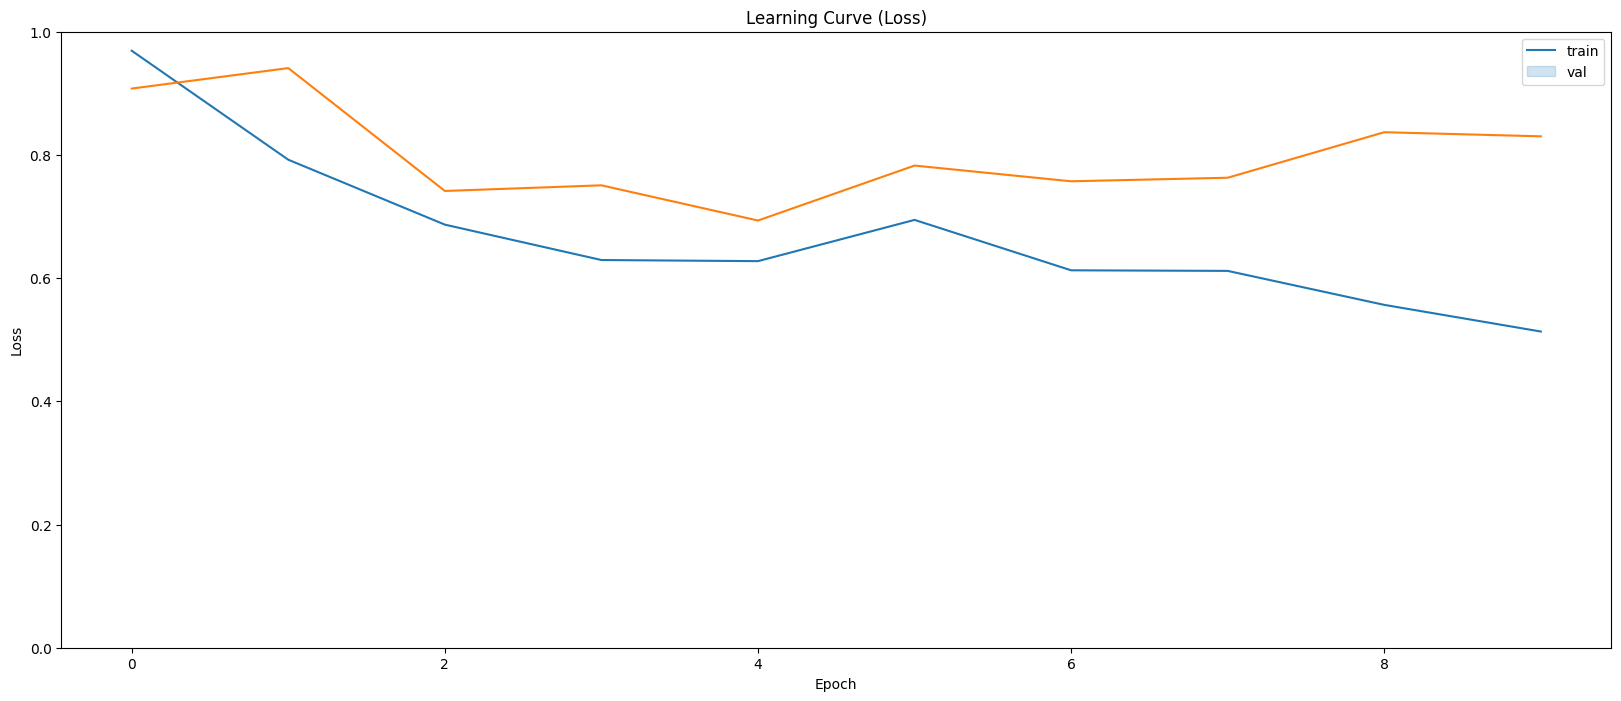

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

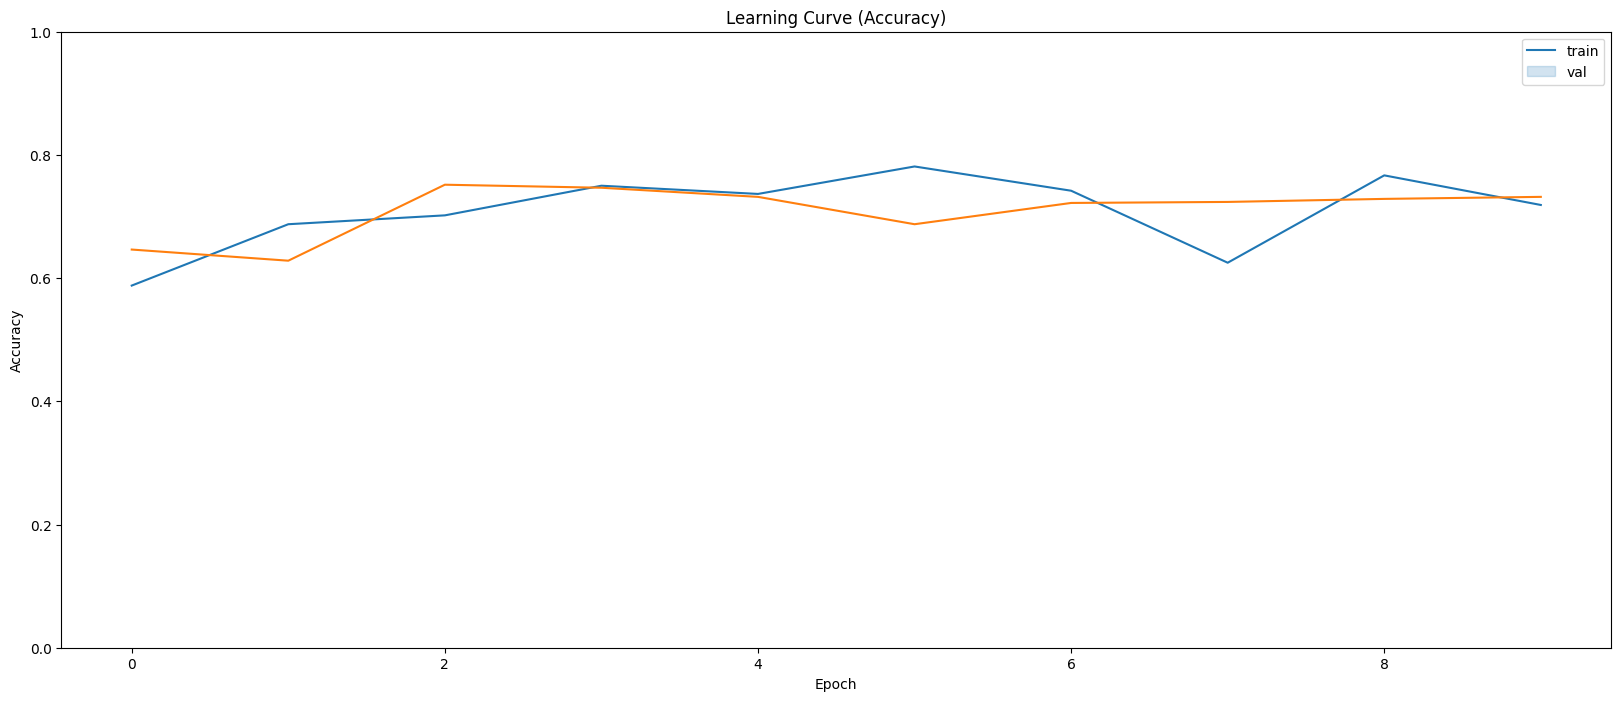

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['categorical_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_categorical_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model.evaluate(ds_val, steps = len(df_val) // BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.6879934072494507
Val accuracy: 0.7335526347160339


In [ ]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test loss: 0.7961421608924866
Test accuracy: 0.5833333134651184


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


# **CNN with Pre-Trained Weight**


In [ ]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Xception Model with Random Forest Classifier
def get_pretrained():

    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(3, activation='softmax')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [ ]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='categorical_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics=['categorical_accuracy'])

model_pretrained.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 8, 8, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,139 (80.58 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_path = "/content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5"

checkpoint = ModelCheckpoint(filepath=model_path,
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

In [ ]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[checkpoint, early_stopping, plateau],
          steps_per_epoch=(len(df_train) // BATCH),
          validation_steps=(len(df_val) // BATCH));

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - categorical_accuracy: 0.5693 - loss: 0.9165 
Epoch 1: val_loss improved from inf to 0.72481, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 1999s 12s/step - categorical_accuracy: 0.5698 - loss: 0.9158 - val_categorical_accuracy: 0.7039 - val_loss: 0.7248 - learning_rate: 5.0000e-05
Epoch 2/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 32:37 12s/step - categorical_accuracy: 0.7500 - loss: 0.5826
Epoch 2: val_loss did not improve from 0.72481
162/162 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - categorical_accuracy: 0.7500 - loss: 0.5826 - val_categorical_accuracy: 0.6957 - val_loss: 0.7266 - learning_rate: 5.0000e-05
Epoch 3/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - categorical_accuracy: 0.7204 - loss: 0.6487 
Epoch 3: val_loss improved from 0.72481 to 0.66320, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 2061s 12s/step - categorical_accuracy: 0.7205 - loss: 0.6484 - val_categorical_accuracy: 0.7467 - val_loss: 0.6632 - learning_rate: 5.0000e-05
Epoch 4/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 33:29 12s/step - categorical_accuracy: 0.8438 - loss: 0.4925
Epoch 4: val_loss did not improve from 0.66320
162/162 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - categorical_accuracy: 0.8438 - loss: 0.4925 - val_categorical_accuracy: 0.7418 - val_loss: 0.6746 - learning_rate: 5.0000e-05
Epoch 5/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - categorical_accuracy: 0.7547 - loss: 0.5884 
Epoch 5: val_loss improved from 0.66320 to 0.65581, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 2017s 12s/step - categorical_accuracy: 0.7548 - loss: 0.5883 - val_categorical_accuracy: 0.7401 - val_loss: 0.6558 - learning_rate: 5.0000e-05
Epoch 6/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 34:52 13s/step - categorical_accuracy: 0.7188 - loss: 0.5409
Epoch 6: val_loss did not improve from 0.65581
162/162 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - categorical_accuracy: 0.7188 - loss: 0.5409 - val_categorical_accuracy: 0.7434 - val_loss: 0.6600 - learning_rate: 5.0000e-05
Epoch 7/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - categorical_accuracy: 0.7629 - loss: 0.5596 
Epoch 7: val_loss improved from 0.65581 to 0.61959, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 2106s 13s/step - categorical_accuracy: 0.7629 - loss: 0.5596 - val_categorical_accuracy: 0.7714 - val_loss: 0.6196 - learning_rate: 5.0000e-05
Epoch 8/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 44:45 17s/step - categorical_accuracy: 0.8438 - loss: 0.4200
Epoch 8: val_loss did not improve from 0.61959
162/162 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - categorical_accuracy: 0.8438 - loss: 0.4200 - val_categorical_accuracy: 0.7697 - val_loss: 0.6333 - learning_rate: 5.0000e-05
Epoch 9/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - categorical_accuracy: 0.7735 - loss: 0.5393 
Epoch 9: val_loss improved from 0.61959 to 0.60729, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 2123s 13s/step - categorical_accuracy: 0.7735 - loss: 0.5392 - val_categorical_accuracy: 0.7747 - val_loss: 0.6073 - learning_rate: 5.0000e-05
Epoch 10/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 29:09 11s/step - categorical_accuracy: 0.8125 - loss: 0.5884
Epoch 10: val_loss did not improve from 0.60729
162/162 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - categorical_accuracy: 0.8125 - loss: 0.5884 - val_categorical_accuracy: 0.7747 - val_loss: 0.6084 - learning_rate: 5.0000e-05
Epoch 11/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - categorical_accuracy: 0.7903 - loss: 0.5211 
Epoch 11: val_loss improved from 0.60729 to 0.60338, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 2134s 13s/step - categorical_accuracy: 0.7902 - loss: 0.5211 - val_categorical_accuracy: 0.7845 - val_loss: 0.6034 - learning_rate: 5.0000e-05
Epoch 12/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 33:59 13s/step - categorical_accuracy: 0.5938 - loss: 0.9790
Epoch 12: val_loss did not improve from 0.60338
162/162 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - categorical_accuracy: 0.5938 - loss: 0.9790 - val_categorical_accuracy: 0.7829 - val_loss: 0.6074 - learning_rate: 5.0000e-05
Epoch 13/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - categorical_accuracy: 0.7843 - loss: 0.5135 
Epoch 13: val_loss improved from 0.60338 to 0.56605, saving model to /content/drive/MyDrive/Nexmedis/Model Checkpoint/xception.h5


162/162 ━━━━━━━━━━━━━━━━━━━━ 2076s 13s/step - categorical_accuracy: 0.7843 - loss: 0.5135 - val_categorical_accuracy: 0.8076 - val_loss: 0.5661 - learning_rate: 5.0000e-05
Epoch 14/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 35:20 13s/step - categorical_accuracy: 0.8438 - loss: 0.4874
Epoch 14: val_loss did not improve from 0.56605
162/162 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - categorical_accuracy: 0.8438 - loss: 0.4874 - val_categorical_accuracy: 0.8026 - val_loss: 0.5674 - learning_rate: 5.0000e-05
Epoch 15/50
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - categorical_accuracy: 0.7730 - loss: 0.5150 
Epoch 15: val_loss did not improve from 0.56605

Epoch 15: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
162/162 ━━━━━━━━━━━━━━━━━━━━ 2132s 13s/step - categorical_accuracy: 0.7730 - loss: 0.5150 - val_categorical_accuracy: 0.7747 - val_loss: 0.6085 - learning_rate: 5.0000e-05
Epoch 16/50
  1/162 ━━━━━━━━━━━━━━━━━━━━ 32:04 12s/step - categorical_accuracy: 0.7188 - loss: 0.6017
Epoch 16

KeyboardInterrupt: 

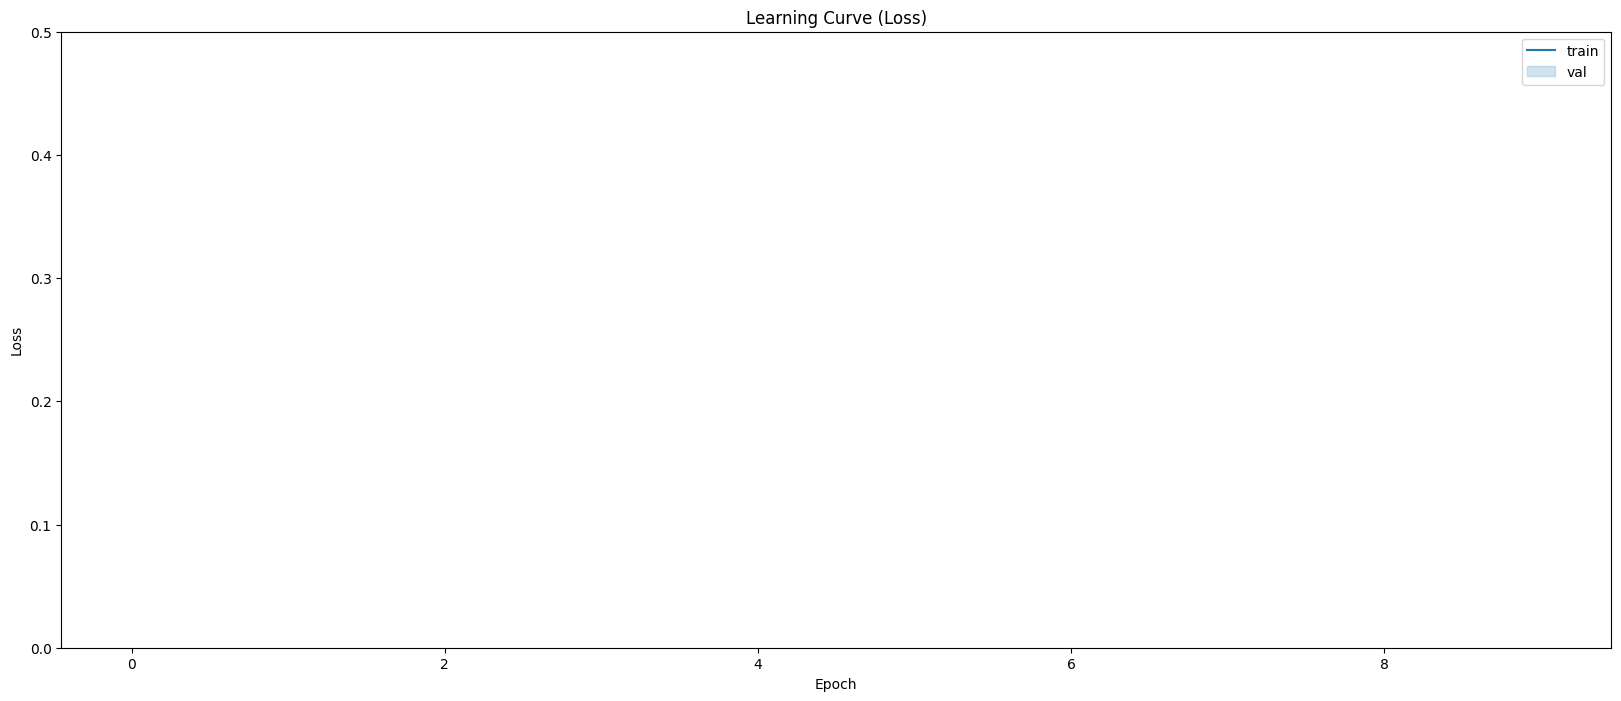

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

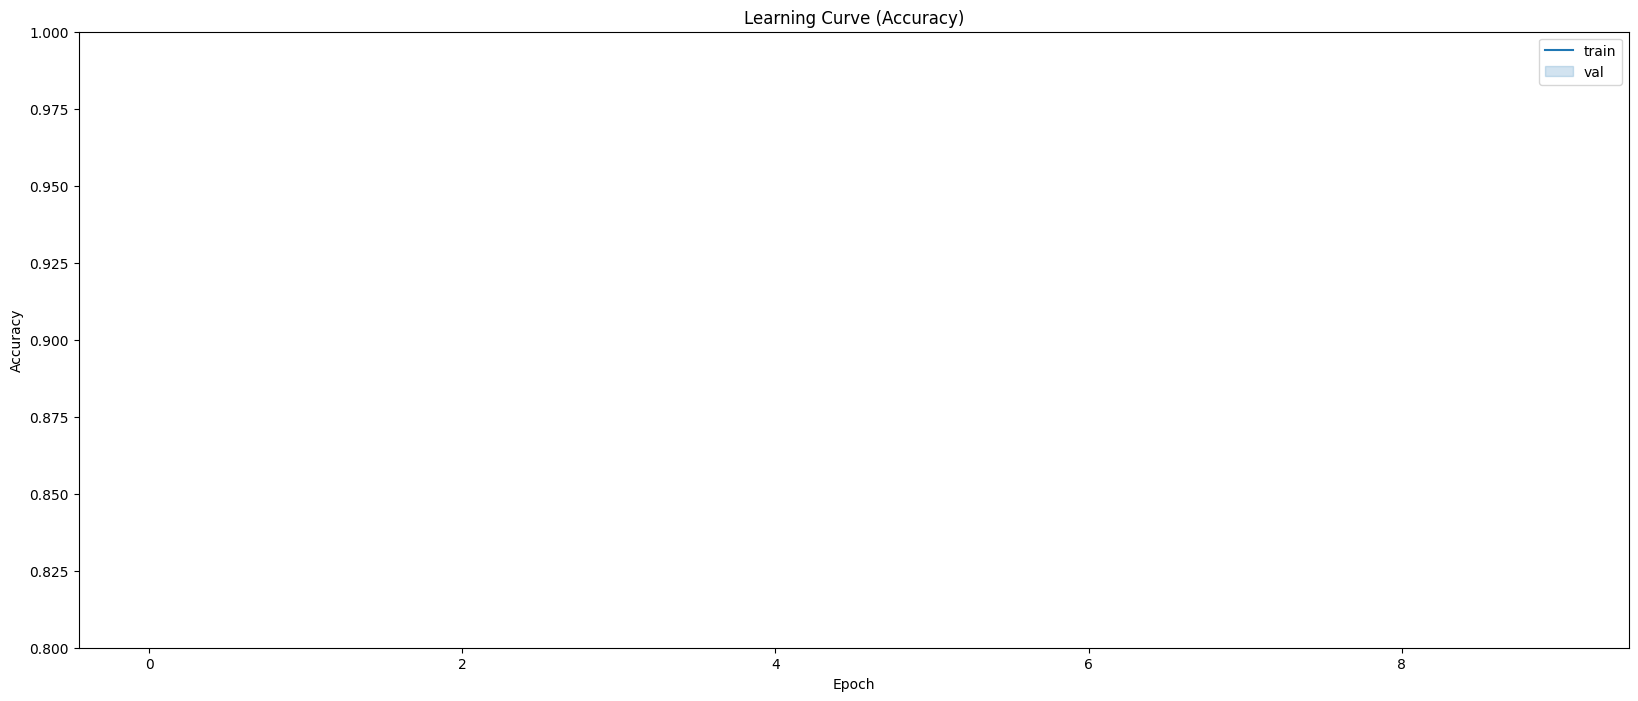

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['categorical_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_categorical_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(df_val)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

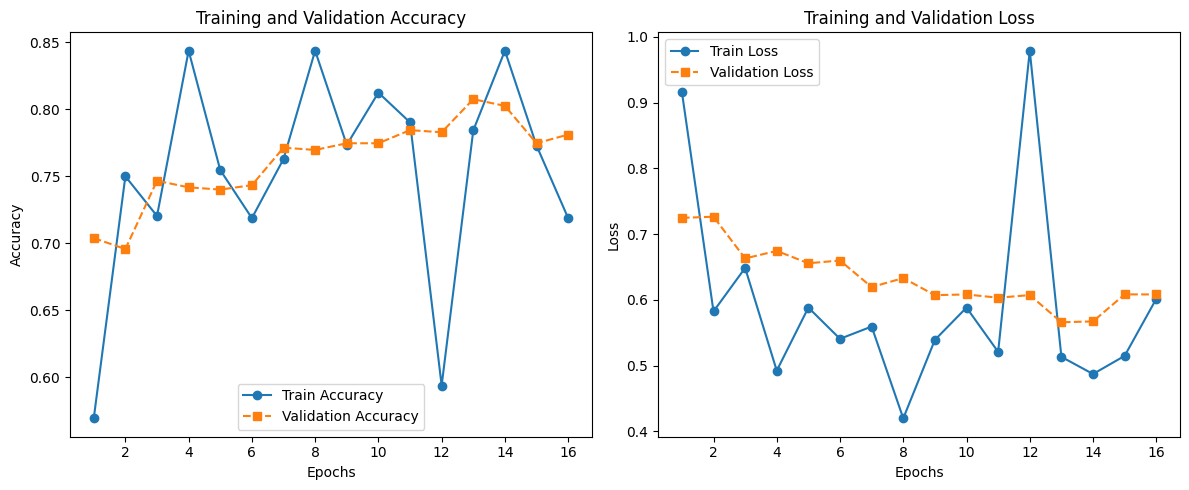

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from logs
epochs = list(range(1, 17))
categorical_accuracy = [0.5693, 0.7500, 0.7204, 0.8438, 0.7547, 0.7188, 0.7629, 0.8438, 0.7735, 0.8125, 0.7903, 0.5938, 0.7843, 0.8438, 0.7730, 0.7188]
val_categorical_accuracy = [0.7039, 0.6957, 0.7467, 0.7418, 0.7401, 0.7434, 0.7714, 0.7697, 0.7747, 0.7747, 0.7845, 0.7829, 0.8076, 0.8026, 0.7747, 0.7812]
loss = [0.9165, 0.5826, 0.6487, 0.4925, 0.5884, 0.5409, 0.5596, 0.4200, 0.5393, 0.5884, 0.5211, 0.9790, 0.5135, 0.4874, 0.5150, 0.6017]
val_loss = [0.7248, 0.7266, 0.6632, 0.6746, 0.6558, 0.6600, 0.6196, 0.6333, 0.6073, 0.6084, 0.6034, 0.6074, 0.5661, 0.5674, 0.6085, 0.6084]

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, categorical_accuracy, label="Train Accuracy", marker='o', linestyle='-')
plt.plot(epochs, val_categorical_accuracy, label="Validation Accuracy", marker='s', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
# plt.grid()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Train Loss", marker='o', linestyle='-')
plt.plot(epochs, val_loss, label="Validation Loss", marker='s', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
# plt.grid()

# Show plots
plt.tight_layout()
plt.show()
